## Representaciones de datos para Redes Neuronales
- En el ejemplo anteior los datos estában en matrices multidimensionales **Numpy** también llamadas **tensores**
- Un **tensor** es un contenedor de datos, casi siempre numéricos. Una **Matriz** es un **Tensor Bidimensional**
- En un tensor, la **dimensión** se llama **eje** y el **número de ejes** se llama **rango**

### Tensores 0D (escalares)
- En **Numpy**, un número `float32` o `float64` es un tensor escalar
- Podemos mostrar el número de ejes de un tensor Numpy a el atributo `ndim` (en el caso del tensor escalar será igual a cero)


In [ ]:
import numpy as np
x = np.array(12)
x, x.ndim

(array(12), 0)

### Tensores 1D (vectores)
- En **Numpy**, una cadena de números es un tensor 1D o **vector**
- Un **tensor 1D** tiene exactamente un **eje A**

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x, x.ndim

(array([12,  3,  6, 14,  7]), 1)

- Este vector de 5 entradas es un **vector 5-dimensional** (1 eje y 5 dimensiones) que no debemos confundir con un **tensor 5D** (que tendría 5 ejes, con cualquier cantidad de dimensiones a lo largo de cada eje, también llamado **tensor de rango 5**)

### Tensores 2D (matrices)
- En **Numpy**, una cadena de vectores es un tensor 2D o **matriz**
- Un **tensor 2D** tiene exactamente un **eje filas**  y un **eje colunas**

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x, x.ndim

(array([[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]), 2)

### Tensores 3D y con más dimensiones
- En **Numpy**, una cadena de matrices (cubo de números) es un tensor 3D
- Con Deep Learning solemos manipular tensores de 0D a 4D aunque si trabajamos con **video**, lo hacemos con **tensores 5D**

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x, x.ndim

(array([[[ 5, 78,  2, 34,  0],
         [ 6, 79,  3, 35,  1],
         [ 7, 80,  4, 36,  2]],
 
        [[ 5, 78,  2, 34,  0],
         [ 6, 79,  3, 35,  1],
         [ 7, 80,  4, 36,  2]],
 
        [[ 5, 78,  2, 34,  0],
         [ 6, 79,  3, 35,  1],
         [ 7, 80,  4, 36,  2]]]), 3)

### Atributos Clave de un tensor
1. **Número de ejes (rango)**: es el `ndim` de Numpy
2. **Forma**: Tupla de enteros que indica cuantas dimensiones tiene el tensor en cada eje:
  - El **escalar** del ejemplo (**tensor 0D**) tiene **forma ()**
  - El **vector** del ejemplo (**tensor 1D**) tiene **forma (5,)**
  - La **matriz** del ejemplo (**tensor 2D**) tiene **forma (3,5)**
  - El **tensor 3D** del ejemplo tiene **forma (3,3,5)**)
3. **Tipo de Datos** `dtype`:
  - `float32`
  - `uint8`
  - `float64`
  - ...
  - Tensor `char` dificilmente de encontrar (no soportado por Numpy)

In [ ]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 60K Matrices (imágenes) de 28 filas (píxeles) x 28 columanas (píxeles)
# de enteros de 8 bits (256 valores en escala de grises)
train_images.ndim, train_images.shape, train_images.dtype

11501568/11490434 [==============================] - 0s 0us/step


(3, (60000, 28, 28), dtype('uint8'))

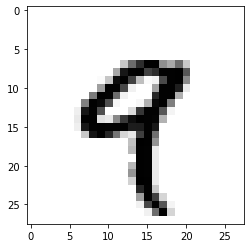

In [ ]:
# Veamos el cuarto elemento de ese tensor y pintémoslo con matplotlib
import matplotlib.pyplot as plt
# Seleccionamos un dígito específico a lo largo del primer eje (Cortar el tensor)
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Manipular tensores en Numpy
- Operaciones de corte de tensores

In [ ]:
# Selecciono número de 10 a 100 (100 no incluido)
# y los mete en una cadena de forma (90,28,28)
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
# Que es lo mismo que hacer esto
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
# Que es lo mismo que hacer esto
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
# Selecciona 14 x 14 píxeles en la esquina inferior derecha
# de todas las imágenes
my_slice = train_images[:, 14:, 14:]

In [ ]:
# Selecciona 14 x 14 píxeles centradas en el medio
# de todas las imágenes
my_slice = train_images[:, 7:-7, 7:-7]

### Notación de los lotes de datos
- Todos los índices empiezan por 0
- El primer eje (el 0) es el **eje de muestras** o **dimensión de muestras**. En el ejemplo, las muestras son las imágenes en formato matriz
- Los modelos de deep learning no procesan un conjunto de datos completos de una vez, si no que los descomponen en **lotes** pequeños.
- Al considerar un tensor en lotes, el primer eje (eje 0) se llama **eje del lote** o **dimensión del lote**

In [ ]:
# Ejemplo de lote de 128 - lote 0
batch = train_images[:128]

In [ ]:
# Siguiente lote de 128 - lote 1
batch = train_images[128:256]

In [ ]:
# n-ésimo lote
n = 3 # Ejemplo lote 3
batch = train_images[128 * n:128 * (n + 1)]

### Ejemplos de tensores de datos en el mundo real
- **Datos vectoriales:** Tensores 2D con forma (**muestras**, **características**)
  - Ejemplo: 100K personas caracterizadas con un vector de 3 valores (edad, código_postal, renta). Tensor 2D con forma (100000,3)
  - Ejemplo: 500 documentos donde, por cada documento, tenemos el número de veces que aparece cada palabra de un diccionario de 20K palabras. Tensor 2D con forma (500, 20000)
- **Datos de series temporales o de secuencias:** Tensores 3D con forma (**muestras**, **pasos de tiempo**, **características**)
  - Si el tiempo (o la noción de orden secuencial) es importante en los datos, usar un tensor 3D, con un eje de tiempo explícito que, por convención, será el segundo eje)

      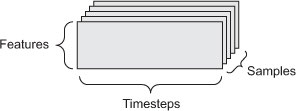
  - Ejemplo: Cada minuto almacenamos el precio actual de un valor de la bolsa, el precio más alto en ese minuto y el precio más bajo). Cada minuto es un vector 3D, un dia entero es un tensor 2D con forma (480,3), y en un año es un tensor 3D con forma (256,480,3). ¿Y si queremos meter los 35 valores de las empresas del IBEX?
- **Imágenes:** Tensores 4D con forma (**muestras**, **altura**, **anchura**, **canales**) o (**muestras**, **canales**, **altura**, **anchura**)
  - Suelen tener 3 dimensiones (altura, anchura y profundidad de color), salvo en escala de grises (un único canal) tensor 2D. Convencionalmente, los tensores de imagen son 3D con un canal de color unidimensional para las imágenes de en escala de grises. Lote de 128 imágenes 256 x 256 se almacenarían en un tensor con la forma (128, 256, 256, 1) y (128, 256, 256, 3) si fuera a color
  - **TensorFlow** pone el canal al final por convención y **Theano** lo pone al principio (tras el eje del lote). **Keras** es compatible con ambos
      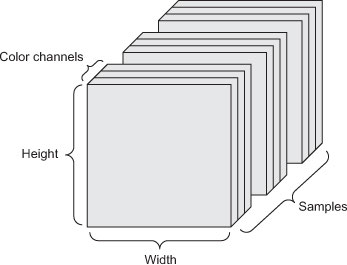
- **Vídeo:** Tensores 5D con forma (**muestras**, **fotogramas**, **altura**, **anchura**, **canales**) o (**muestras**, **fotogramas**, **canales**, **altura**, **anchura**).
  - Un video es entendido como una muestra de fotogramas, siendo cada uno de ellos una imagen a color. 1 Fotograma se guarda en un tensor 3D (altura, anchura, profundidad_de_color), una secuencia de fotogramas se pueden guardar en un tensor 4D (fotograma, altura, anchura, profundidad_de_color), por tanto, un lote de distintos vídeos será un tensor 5D con forma (muestras, fotogramas, altura, anchura, profundidad_color)
  - Ejemplo(4, 240, 144, 256, 3) sería un lote de 4 vídeos videos de 60 segundos (muestreados a 4 fps)  144 x 256 a color. Darse cuenta que serían más de 106 Millones de valores... Si el `dtype` del tensor fuera `float32`, el tensor sería 405MB. De esto nos salva la compresión MPEG.

---